# Import Data


In [922]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install xlrd
%pip install scikit-learn
%pip install seaborn
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [923]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
import seaborn as sns  # สร้างกราฟ Boxplot
from scipy.stats import zscore
from sklearn.metrics import mean_absolute_error

%matplotlib inline


In [924]:
df1 = pd.read_excel("./dataset/ค่าเฉลี่ยคุณภาพน้ำคลอง (พ.ศ. 2561-2563).xlsx")
df2 = pd.read_excel(
    "./dataset/ค่าเฉลี่ยคุณภาพน้ำแม่น้ำเจ้าพระยา ในเขตกรุงเทพมหานคร (พ.ศ.2561-2563).xlsx")


df_concat = pd.concat([df1, df2], axis=0)

# Preprocessing - Data Cleaning


In [925]:
df_concat.shape

(938, 21)

In [926]:
df_concat

,Canal_id,year,Canal_name,Sample_water_point,TEMP. (oC),pH,DO (mg/l),H2S (mg/l),BOD (mg/l),COD (mg/l),...,TKN (mg/l),NH3N (mg/l),NO2 (mg/l),NO3 (mg/l),T-P (mg/l),T.Coliform (col/100ml),No_,year_,Conduct. (us/cm),Salinity (ppt)
0,12.0,2561.0,คลองคูเมืองเดิม,ปตร.ราชินี,25.00,8.00,2.70,0.0,5.00,42.00,...,2.20,0.90,0.00,2.20,0.10,930000.0,NaN,NaN,NaN,NaN
1,13.0,2561.0,คลองคูเมืองเดิม,หน้ากรมที่ดิน,25.00,8.10,2.40,0.0,5.00,53.00,...,1.70,0.60,0.00,2.20,0.10,11000000.0,NaN,NaN,NaN,NaN
2,14.0,2561.0,คลองคูเมืองเดิม,อนุสาวรีย์แม่ธรณีมวยผม สนามหลวง,25.00,8.00,1.70,0.0,5.00,56.00,...,2.20,0.60,0.34,2.30,0.20,4600000.0,NaN,NaN,NaN,NaN
3,15.0,2561.0,คลองคูเมืองเดิม,ปตร. พระปิ่นเกล้า,25.00,7.90,3.00,0.0,4.00,47.00,...,2.80,0.60,0.00,1.90,0.10,30000.0,NaN,NaN,NaN,NaN
4,16.0,2561.0,คลองคูเมืองเดิม,สะพานหน้ากระทรวงมหาดไทย,25.00,7.30,1.40,0.0,6.00,36.00,...,2.80,0.60,0.14,1.10,0.30,1500000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,NaN,NaN,NaN,สะพานพระพุทธยอดฟ้า,30.87,6.98,1.93,0.0,4.19,78.63,...,2.68,0.14,0.33,3.47,0.40,10300000.0,3.0,2563.0,5492.99,3.09
17,NaN,NaN,NaN,สะพานกรุงเทพ,30.87,6.96,2.23,0.0,4.88,89.79,...,3.28,0.58,0.44,3.26,0.40,19900000.0,4.0,2563.0,7305.01,4.21
18,NaN,NaN,NaN,สะพานพระราม 9,30.87,6.96,2.16,0.0,4.67,98.00,...,2.75,0.43,0.44,3.13,0.38,432000.0,5.0,2563.0,8578.67,5.01
19,NaN,NaN,NaN,ท่าเรือวัดคลองภูมิ,30.58,7.02,3.41,0.0,5.18,126.11,...,2.80,0.26,0.55,2.73,0.53,25700000.0,6.0,2563.0,11872.75,7.07


In [927]:
df = df_concat.copy()
df.rename(columns=lambda x: x.strip(), inplace=True)


In [928]:
df.columns

Index(['Canal_id', 'year', 'Canal_name', 'Sample_water_point', 'TEMP. (oC)',
       'pH', 'DO (mg/l)', 'H2S (mg/l)', 'BOD (mg/l)', 'COD (mg/l)',
       'SS (mg/l)', 'TKN (mg/l)', 'NH3N (mg/l)', 'NO2 (mg/l)', 'NO3 (mg/l)',
       'T-P (mg/l)', 'T.Coliform (col/100ml)', 'No_', 'year_',
       'Conduct. (us/cm)', 'Salinity (ppt)'],
      dtype='object')

In [929]:
weighting = {
    "DO (mg/l)": 0.22,
    "BOD (mg/l)": 0.19,
    "COD (mg/l)": 0.16,
    "NH3N (mg/l)": 0.15,
    "SS (mg/l)": 0.16,
    "pH": 0.12
}


In [930]:

# เลือกเฉพาะ columns
df = df[["DO (mg/l)", "BOD (mg/l)", "COD (mg/l)",
         "NH3N (mg/l)", "SS (mg/l)", "pH"]]


In [931]:
df

,DO (mg/l),BOD (mg/l),COD (mg/l),NH3N (mg/l),SS (mg/l),pH
0,2.70,5.00,42.00,0.90,26.00,8.00
1,2.40,5.00,53.00,0.60,25.00,8.10
2,1.70,5.00,56.00,0.60,24.00,8.00
3,3.00,4.00,47.00,0.60,17.00,7.90
4,1.40,6.00,36.00,0.60,7.00,7.30
...,...,...,...,...,...,...
16,1.93,4.19,78.63,0.14,57.83,6.98
17,2.23,4.88,89.79,0.58,40.33,6.96
18,2.16,4.67,98.00,0.43,48.29,6.96
19,3.41,5.18,126.11,0.26,54.50,7.02


## missing value


In [932]:
# ตรวจสอบ missing value
df.isnull().sum()

DO (mg/l)      0
BOD (mg/l)     0
COD (mg/l)     0
NH3N (mg/l)    0
SS (mg/l)      0
pH             0
dtype: int64

In [933]:
df


,DO (mg/l),BOD (mg/l),COD (mg/l),NH3N (mg/l),SS (mg/l),pH
0,2.70,5.00,42.00,0.90,26.00,8.00
1,2.40,5.00,53.00,0.60,25.00,8.10
2,1.70,5.00,56.00,0.60,24.00,8.00
3,3.00,4.00,47.00,0.60,17.00,7.90
4,1.40,6.00,36.00,0.60,7.00,7.30
...,...,...,...,...,...,...
16,1.93,4.19,78.63,0.14,57.83,6.98
17,2.23,4.88,89.79,0.58,40.33,6.96
18,2.16,4.67,98.00,0.43,48.29,6.96
19,3.41,5.18,126.11,0.26,54.50,7.02


In [934]:
# แปลงตัวเลขที่เป็น string ให้เป็นตัวเลข และ เปลี่ยนตัวอักษรที่ไม่ถูกต้องให้เป็น NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [935]:
# ลบข้อมูลที่มี missing value ออกไป
df.dropna(inplace=True)

In [936]:
df.isnull().sum()

DO (mg/l)      0
BOD (mg/l)     0
COD (mg/l)     0
NH3N (mg/l)    0
SS (mg/l)      0
pH             0
dtype: int64

In [937]:
# reset index
df = df.reindex()

## Outlier data


In [938]:
# แสดงค่าสถิติพื้นฐาน
df.describe()

,DO (mg/l),BOD (mg/l),COD (mg/l),NH3N (mg/l),SS (mg/l),pH
count,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000
mean,1.681980,12.609649,64.169236,4.264895,22.539433,7.235315
std,1.274289,9.374797,22.489426,3.612909,17.828665,0.458444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.552083,6.000000,51.000000,1.360417,12.000000,7.116667
50%,1.662500,9.583333,60.500000,3.375000,17.166667,7.254167
75%,2.600000,15.666667,72.229167,6.000000,26.083333,7.400000
max,9.700000,84.500000,202.000000,23.333333,148.333333,9.100000


array([[<Axes: title={'center': 'DO (mg/l)'}>,
        <Axes: title={'center': 'BOD (mg/l)'}>],
       [<Axes: title={'center': 'COD (mg/l)'}>,
        <Axes: title={'center': 'NH3N (mg/l)'}>],
       [<Axes: title={'center': 'SS (mg/l)'}>,
        <Axes: title={'center': 'pH'}>]], dtype=object)

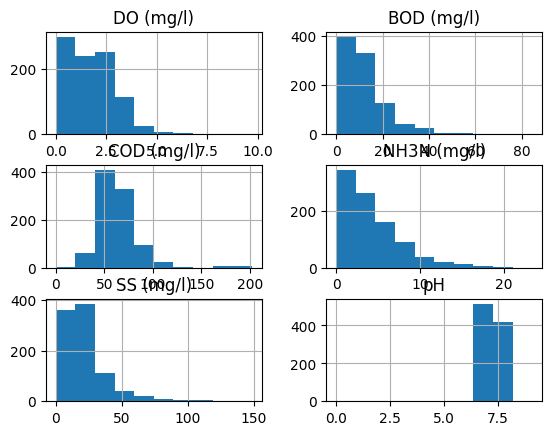

In [939]:
df.hist()

<Axes: >

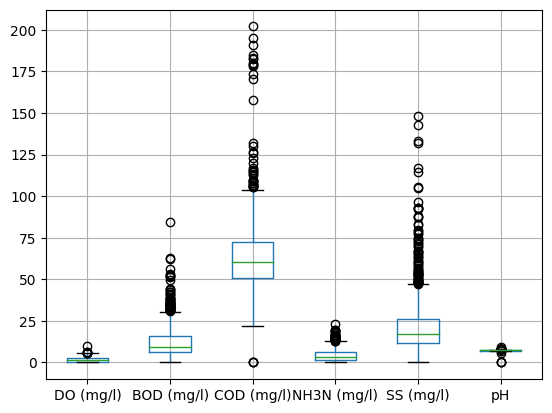

In [940]:
df.boxplot()

จัดการ outlier data


In [941]:
def remove_outliers_iqr(dataframe, columns):
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        threshold = 1.5
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        print(column+">"+"lower_bound:"+str(lower_bound) +
              " upper_bound:"+str(upper_bound))
        dataframe = dataframe[(dataframe[column] >= lower_bound) & (
            dataframe[column] <= upper_bound)]
    return dataframe


In [942]:
# DO	EC	Temp	Salinity	Turbidity	BOD	COD
df_out = df.copy()

df_out = remove_outliers_iqr(
    df_out, ["DO (mg/l)", "BOD (mg/l)", "COD (mg/l)", "NH3N (mg/l)", "SS (mg/l)", "pH"])

DO (mg/l)>lower_bound:-2.5197916666666664 upper_bound:5.671875
BOD (mg/l)>lower_bound:-8.5 upper_bound:30.166666666666664
COD (mg/l)>lower_bound:19.979166666666664 upper_bound:100.14583333333334
NH3N (mg/l)>lower_bound:-5.191666666666666 upper_bound:12.075
SS (mg/l)>lower_bound:-8.59375 upper_bound:46.32291666666667
pH>lower_bound:6.712499999999997 upper_bound:7.812500000000002


<Axes: >

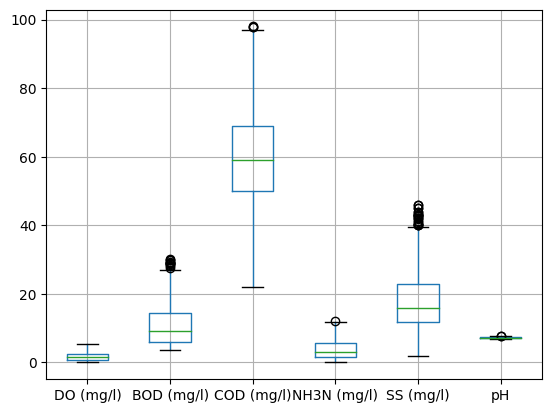

In [943]:
df_out.boxplot()

array([[<Axes: title={'center': 'DO (mg/l)'}>,
        <Axes: title={'center': 'BOD (mg/l)'}>],
       [<Axes: title={'center': 'COD (mg/l)'}>,
        <Axes: title={'center': 'NH3N (mg/l)'}>],
       [<Axes: title={'center': 'SS (mg/l)'}>,
        <Axes: title={'center': 'pH'}>]], dtype=object)

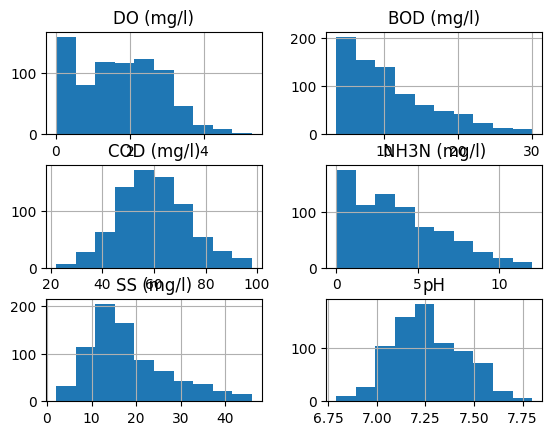

In [944]:
df_out.hist()


## Duplicate data


In [945]:
print('จำนวน Duplicate Data df:', df_out.duplicated().sum())


จำนวน Duplicate Data df: 3


In [946]:
# ลบ Duplicate Data
df_out = df_out.drop_duplicates()

# Data Transformation: Normalization


In [947]:
X_columns = ["DO (mg/l)",
             "BOD (mg/l)",
             "COD (mg/l)",
             "NH3N (mg/l)",
             "SS (mg/l)",
             "pH"]


In [948]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[X_columns])


MinMaxScaler()

## Water Quality Index


In [949]:
# แยก X,Y
df_wqi = df_out[X_columns].copy()
# for x_train
for index, row in df_wqi.iterrows():
    wqi_score = 0
    for x in X_columns:
        wqi_score += row[x]*weighting[x]
    df_wqi.loc[index, 'wqi_score'] = wqi_score

    if wqi_score >= 90:
        df_wqi.loc[index, 'Quality of Water'] = "Excellent"
    elif wqi_score >= 70:
        df_wqi.loc[index, 'Quality of Water'] = "Good"
    elif wqi_score >= 50:
        df_wqi.loc[index, 'Quality of Water'] = "Medium"
    elif wqi_score >= 25:
        df_wqi.loc[index, 'Quality of Water'] = "Bad"
    else:
        df_wqi.loc[index, 'Quality of Water'] = "Very Bad"

In [950]:
df_wqi.sort_values(by=['wqi_score'])

,DO (mg/l),BOD (mg/l),COD (mg/l),NH3N (mg/l),SS (mg/l),pH,wqi_score,Quality of Water
166,2.100000,5.000000,22.000000,0.300000,10.000000,7.500000,7.477000,Very Bad
167,1.400000,5.000000,25.000000,0.300000,11.000000,7.500000,7.963000,Very Bad
253,1.400000,6.000000,25.000000,1.200000,10.000000,7.400000,8.116000,Very Bad
265,1.900000,5.000000,26.000000,1.500000,10.000000,7.400000,8.241000,Very Bad
252,1.000000,6.000000,27.000000,1.500000,13.000000,7.300000,8.861000,Very Bad
...,...,...,...,...,...,...,...,...
354,0.208333,19.333333,97.916667,6.816667,29.250000,7.000000,25.928333,Bad
225,0.000000,29.000000,98.000000,5.600000,19.000000,7.600000,25.982000,Bad
178,0.000000,28.000000,94.000000,4.500000,26.000000,7.400000,26.083000,Bad
820,0.108333,30.083333,91.250000,11.445455,21.000000,7.216667,26.282485,Bad


In [951]:
df_wqi.describe()

,DO (mg/l),BOD (mg/l),COD (mg/l),NH3N (mg/l),SS (mg/l),pH,wqi_score
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,1.708845,11.018244,59.926718,3.839725,18.231381,7.252369,16.429372
std,1.142940,5.937266,13.702816,2.746289,8.987788,0.167597,3.393596
min,0.000000,3.520000,22.000000,0.000000,2.000000,6.791667,7.477000
25%,0.783333,6.000000,50.166667,1.500000,11.833333,7.125000,14.038458
50%,1.708333,9.166667,59.000000,3.200000,16.000000,7.258333,16.352000
75%,2.600000,14.416667,69.083333,5.649242,22.916667,7.391667,18.559072
max,5.300000,30.083333,98.000000,12.018182,46.000000,7.800000,28.275583


In [952]:
df_wqi['Quality of Water'].value_counts()


Quality of Water
Very Bad    769
Bad           6
Name: count, dtype: int64

In [953]:
df_wqi['Quality of Water'].unique()


array(['Very Bad', 'Bad'], dtype=object)

In [954]:
df_split_copy = df_wqi.copy()

## แบ่งชุดข้อมูล


In [955]:
seed = 3012

df_train, df_test = train_test_split(
    df_split_copy, test_size=0.1, random_state=seed)


In [956]:
# จำนวนชุดข้อมูล
print('จำนวนชุดข้อมูลทั้งหมด :', len(df))
print('จำนวนชุดข้อมูล training :', len(df_train))
print('จำนวนชุดข้อมูล test :', len(df_test))

จำนวนชุดข้อมูลทั้งหมด : 938
จำนวนชุดข้อมูล training : 697
จำนวนชุดข้อมูล test : 78


In [957]:
X_train = df_train[X_columns]
Y_train = df_train['Quality of Water'].values.ravel()

X_test = df_test[X_columns]
Y_test = df_test['Quality of Water'].values.ravel()

## Transform


In [958]:
X_train_transform = scaler.transform(X_train)

X_test_transform = scaler.transform(X_test)


# KNN


In [959]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# สร้างโมเดล KNNC
model = KNeighborsClassifier(n_neighbors=5)

# ฝึกโมเดลด้วยชุด Train
model.fit(X_train_transform,  Y_train)

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด test

Y_pred = model.predict(X_test_transform)

In [960]:

# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(Y_test, Y_pred)

print(f"KNNC Accuracy: {accuracy}")

KNNC Accuracy: 0.9871794871794872


## Evaluating Model KNNC


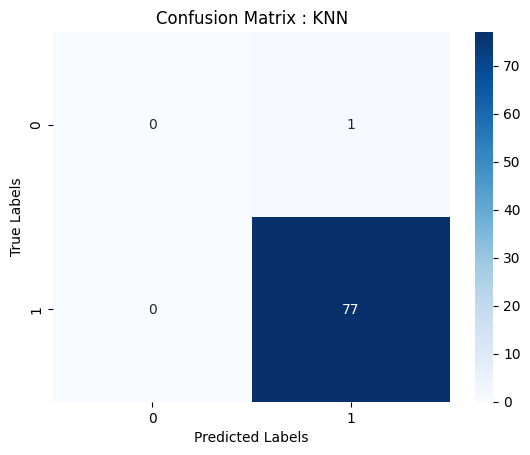

In [961]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix : KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Naive bayes


In [962]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [963]:
# สร้างโมเดล Naive Bayes
model = GaussianNB()

# ฝึกโมเดลด้วยชุด Train
model.fit(X_train_transform,  Y_train)

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด test

Y_pred = model.predict(X_test_transform)

## Evaluating Model Naive bayes


In [964]:
# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Naive Bayes Accuracy: {accuracy}")

Naive Bayes Accuracy: 0.9871794871794872


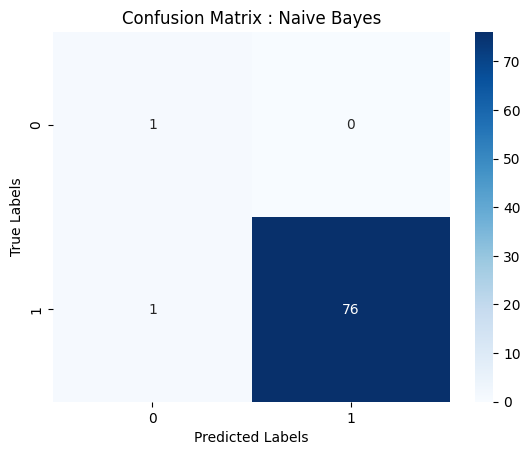

In [965]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix : Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Decision Tree


In [966]:
from sklearn.tree import DecisionTreeClassifier


# สร้างโมเดล Decision Tree
model = DecisionTreeClassifier()

# ฝึกโมเดลด้วยชุด Train
clf = model.fit(X_train_transform, Y_train)

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด Validation

Y_pred = model.predict(X_test_transform)

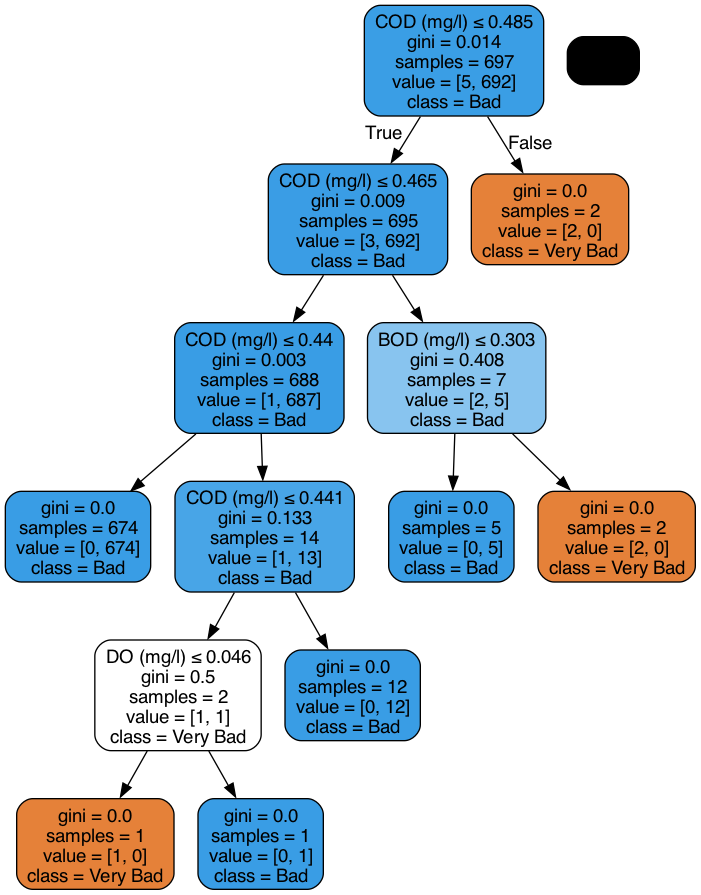

In [967]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X_columns, class_names=df_wqi['Quality of Water'].unique())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

## Evaluating Model Decision Tree


In [968]:
# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(Y_test, Y_pred)

# แสดงผลลัพธ์
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.9743589743589743


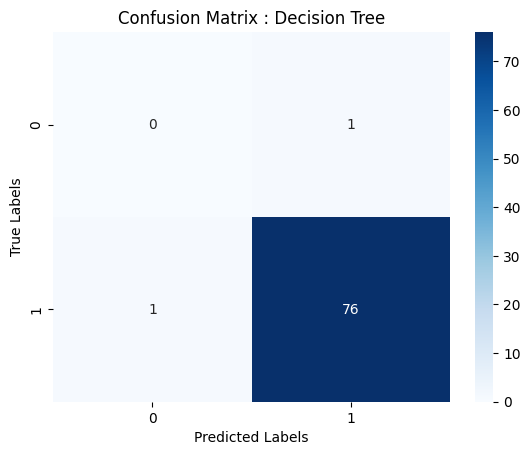

In [969]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix : Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()